## Eigenvalores y eigenvectores

__Ejercicio 1:__ ¿Como podemos evaluar funciones en matrices?
__Hint:__ ¿que operaciones sabemos que estan bien definidas sobre matrices?

Las funciones se evalúan en cada entrada de la matriz, entregando el resultado de la función en cada entrada correspondiente. En otras palabras, si:

$$A=(a_{ij})$$

Entonces:

$$f(A)=f(a_{ij})$$

__Ejercicio 2:__ ¿Como se define una matriz simétrica?

Una matriz es simetrica siempre y cuando cumpla que:
* Es de $n$ x $n$
* Dicha matríz es igual a su traspuesta, es decir: $A = A^t$

__Ejercicio 3:__ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Se puede obtener cualquier matriz simétrica a partir de una matríz de $n$ x $n$ con tan sólo diagonalizarla. En otras palabras:

__Definición__:

Sea $A$ ∈ $R^{n×n}$, se dice que A es diagonalizable ⇔ $A$ es semejante a una matriz diagonal ⇔ ∃ $P ∈ R^{n×n}$ invertible tal que $P^-1AP =D$ diagonal.

__Condiciones que debe cumplir:__

Una matriz real cuadrada de orden n es diagonalizable si y sólo si tiene $n$ vectores propios linealmente independientes asociados a valores propios reales.

__Ejercicio 4:__ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} -1 & 1\\ -1 & -1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.
* Recuerde que $\vec x(t) = e^{A t}\vec x_0$, y necesitamos graficar la trayectoria $\vec x(t)$ en el espacio de fase.

__Nota 1:__ De momento no utilicen `expm`.

__Nota 2:__ El operador `*` funciona para multiplicar matrices.

__Note 3:__ Observen que la matriz $A$ no es simétrica, aqui no se cumple que $w^T=w^{-1}$.

In [2]:
using PyPlot

In [3]:
A = [-1 1;-1 -1];                           #Nuestra matriz
eigen_valores=eigvals(A);                   #Nuestros eigenvalores de la matriz A
matriz_diagonal=diagm(eigen_valores);       #Matriz diagonal cuyas entradas son eigenvalores de A
matriz_eigenvalores = eigvecs(A);           #Matriz cuyas columnas son los eigenvectores de la matriz A.

In [4]:
eA(t) = matriz_eigenvalores*diagm(exp.(eigen_valores*t))*inv(matriz_eigenvalores);

E(t,x0) = matriz_eigenvalores*diagm(exp.(eigen_valores*t))*inv(matriz_eigenvalores)*x0;

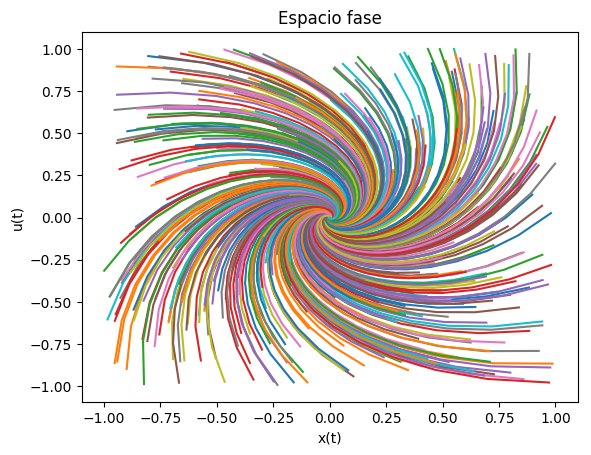

In [5]:
t1 =  linspace(0,15,100);

for i in 1:500    
    X = []
    xr = [2*rand()-1; 2*rand()-1]
 
    for k in 1:length(t1)
        e = E(t1[k], xr)
        push!(X,e)
    end

    listx=map(x->x[1],real(X))
    listu=map(x->x[2],real(X))
    plot(listx,listu)
end
title("Espacio fase")
xlabel("x(t)")
ylabel("u(t)")

show()